In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [2]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_GLD.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

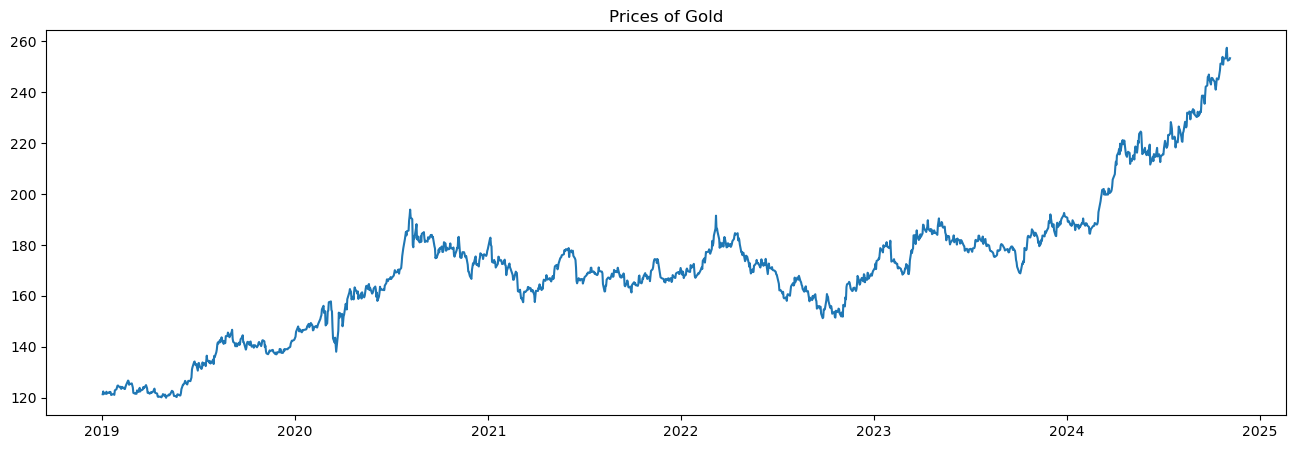

In [4]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [5]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [6]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [7]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [8]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11314, saving model to save_model_7_2_1.keras
19/19 - 4s - 222ms/step - loss: 0.1131
Epoch 2/80

Epoch 2: loss improved from 0.11314 to 0.03732, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0373
Epoch 3/80

Epoch 3: loss improved from 0.03732 to 0.02513, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0251
Epoch 4/80

Epoch 4: loss improved from 0.02513 to 0.02375, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0237
Epoch 5/80

Epoch 5: loss improved from 0.02375 to 0.02295, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0229
Epoch 6/80

Epoch 6: loss did not improve from 0.02295
19/19 - 1s - 52ms/step - loss: 0.0251
Epoch 7/80

Epoch 7: loss improved from 0.02295 to 0.02223, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0222
Epoch 8/80

Epoch 8: loss improved from 0.02223 to 0.02113, saving model to save_model_7_2_1.keras


In [9]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [10]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [11]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [12]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [13]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9495267868041992], [0.8995023369789124], [0.8566914796829224], [0.8365184664726257], [0.8307141661643982], [0.8270152807235718], [0.8188571929931641], [0.8058614730834961], [0.7907134294509888], [0.7761014103889465], [0.7632699012756348], [0.7521112561225891], [0.741901159286499], [0.7319335341453552], [0.7218000292778015], [0.7113817930221558], [0.700722873210907], [0.6899052262306213], [0.6789808869361877], [0.6679571866989136], [0.6568143367767334], [0.6455276608467102], [0.6340830326080322], [0.6224824786186218], [0.6107419729232788], [0.5988855361938477], [0.5869415402412415], [0.5749378800392151], [0.5629006624221802], [0.5508542060852051]]


In [15]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[250.55690491]
 [243.67554172]
 [237.78648029]
 [235.01148064]
 [234.2130411 ]
 [233.70422243]
 [232.5819959 ]
 [230.7943047 ]
 [228.71053986]
 [226.70051055]
 [224.93540819]
 [223.40042499]
 [221.99592409]
 [220.6247776 ]
 [219.2308127 ]
 [217.79768014]
 [216.33143916]
 [214.84336366]
 [213.34061158]
 [211.8241914 ]
 [210.29138099]
 [208.73878588]
 [207.16446284]
 [205.56869066]
 [203.95366673]
 [202.32269532]
 [200.67967927]
 [199.0284558 ]
 [197.37261617]
 [195.71550567]]


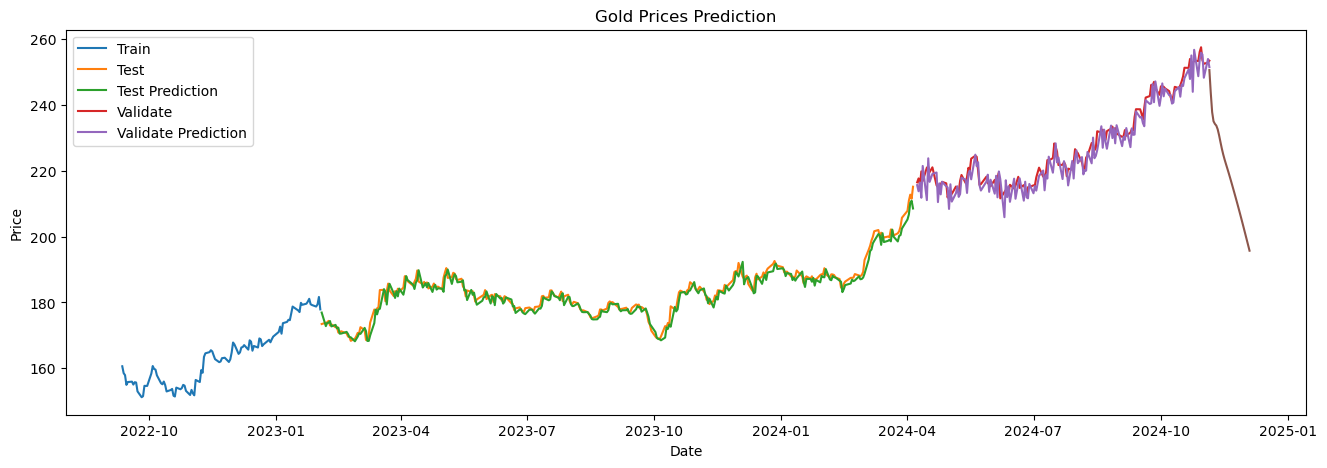

In [18]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [19]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3074098445139775
MAPE:  0.7053545598528257
RMSE:  1.7232178167888381

** Validate **
MAE:  2.7398709486446897
MAPE:  1.2076971549563726
RMSE:  3.3518569872367108


# Split dataset (6-3-1)

---



In [20]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [21]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [22]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [23]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10607, saving model to save_model_6_3_1.keras
16/16 - 4s - 242ms/step - loss: 0.1061
Epoch 2/80

Epoch 2: loss improved from 0.10607 to 0.04030, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0403
Epoch 3/80

Epoch 3: loss improved from 0.04030 to 0.02669, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0267
Epoch 4/80

Epoch 4: loss improved from 0.02669 to 0.02225, saving model to save_model_6_3_1.keras
16/16 - 1s - 54ms/step - loss: 0.0222
Epoch 5/80

Epoch 5: loss improved from 0.02225 to 0.02214, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0221
Epoch 6/80

Epoch 6: loss improved from 0.02214 to 0.02164, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0216
Epoch 7/80

Epoch 7: loss improved from 0.02164 to 0.02119, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0212
Epoch 8/80

Epoch 8: loss improved from 0.02119 to 0.02

In [24]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [25]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [26]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [27]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [28]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9272415041923523], [0.8715847730636597], [0.8178571462631226], [0.779749870300293], [0.7572358846664429], [0.7437554001808167], [0.7326250076293945], [0.7203162312507629], [0.7066051959991455], [0.6931575536727905], [0.6818247437477112], [0.6735466122627258], [0.668148398399353], [0.6647628545761108], [0.6623988151550293], [0.6603363156318665], [0.6582521796226501], [0.6561298966407776], [0.6540846228599548], [0.6522061824798584], [0.6504852175712585], [0.6488218307495117], [0.6470814347267151], [0.6451535820960999], [0.6429855227470398], [0.6405850052833557], [0.6379993557929993], [0.6352900862693787], [0.6325133442878723], [0.6297109127044678]]


In [29]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[247.49134149]
 [239.83520169]
 [232.44442948]
 [227.20239269]
 [224.10536888]
 [222.25099346]
 [220.71989669]
 [219.02670144]
 [217.14061147]
 [215.29075382]
 [213.73181251]
 [212.59307277]
 [211.85049448]
 [211.38477908]
 [211.05958182]
 [210.77586439]
 [210.48917065]
 [210.19722941]
 [209.91588155]
 [209.6574833 ]
 [209.42074737]
 [209.19193188]
 [208.95252301]
 [208.6873276 ]
 [208.38908937]
 [208.05887419]
 [207.70319225]
 [207.33050514]
 [206.94853652]
 [206.56303404]]


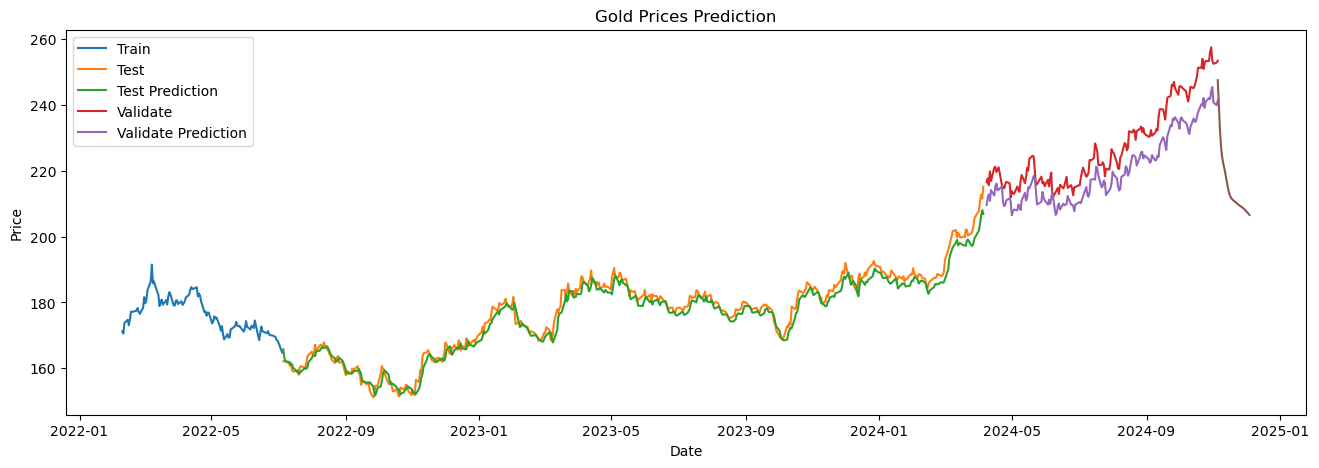

In [30]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [31]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.7951948029217157
MAPE:  0.9989248108993735
RMSE:  2.2929511815396637

** Validate **
MAE:  7.500956355149389
MAPE:  3.24742652897151
RMSE:  8.074344332698688


# Split dataset (5-3-2)

---



In [32]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [33]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [34]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [35]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11239, saving model to save_model_5_3_2.keras
13/13 - 4s - 285ms/step - loss: 0.1124
Epoch 2/80

Epoch 2: loss improved from 0.11239 to 0.04985, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0498
Epoch 3/80

Epoch 3: loss improved from 0.04985 to 0.03588, saving model to save_model_5_3_2.keras
13/13 - 1s - 54ms/step - loss: 0.0359
Epoch 4/80

Epoch 4: loss improved from 0.03588 to 0.02340, saving model to save_model_5_3_2.keras
13/13 - 1s - 53ms/step - loss: 0.0234
Epoch 5/80

Epoch 5: loss improved from 0.02340 to 0.02253, saving model to save_model_5_3_2.keras
13/13 - 1s - 57ms/step - loss: 0.0225
Epoch 6/80

Epoch 6: loss improved from 0.02253 to 0.02233, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0223
Epoch 7/80

Epoch 7: loss improved from 0.02233 to 0.02214, saving model to save_model_5_3_2.keras
13/13 - 1s - 54ms/step - loss: 0.0221
Epoch 8/80

Epoch 8: loss improved from 0.02214 to 0.02

In [36]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [37]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [38]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [39]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [40]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8974379301071167], [0.8451544046401978], [0.7985982894897461], [0.7634248733520508], [0.737231433391571], [0.7167380452156067], [0.6989529728889465], [0.681865930557251], [0.6645320653915405], [0.646820604801178], [0.629059374332428], [0.6117239594459534], [0.5952300429344177], [0.579839289188385], [0.56564861536026], [0.5526289343833923], [0.5406777262687683], [0.5296669006347656], [0.5194752812385559], [0.5100047588348389], [0.5011841058731079], [0.49296432733535767], [0.48531201481819153], [0.4782007932662964], [0.47160619497299194], [0.4655020833015442], [0.45985937118530273], [0.4546463191509247], [0.449829638004303], [0.44537606835365295]]


In [41]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[243.39156191]
 [236.19944027]
 [229.79518119]
 [224.95672615]
 [221.35355661]
 [218.53448618]
 [216.08797167]
 [213.73747817]
 [211.35303172]
 [208.91664324]
 [206.47340842]
 [204.08874879]
 [201.81984568]
 [199.70269363]
 [197.75062457]
 [195.95963729]
 [194.31562913]
 [192.80097998]
 [191.39902084]
 [190.0962558 ]
 [188.8828868 ]
 [187.75217409]
 [186.69952199]
 [185.72130237]
 [184.81414945]
 [183.97446786]
 [183.1982564 ]
 [182.48114897]
 [181.81856632]
 [181.20593329]]


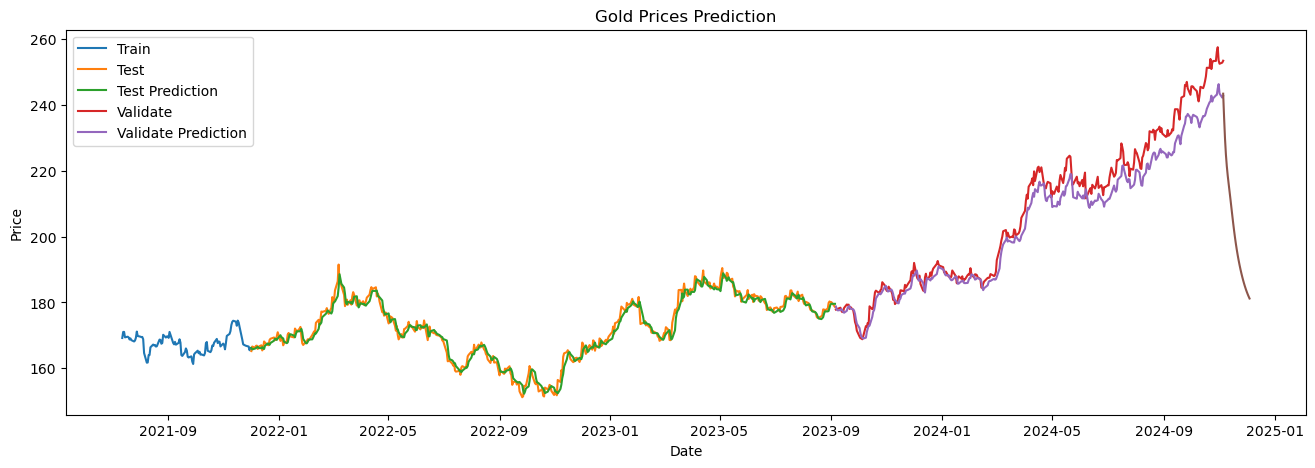

In [42]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [43]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3455455210937506
MAPE:  0.7813621579000165
RMSE:  1.7550419781240905

** Validate **
MAE:  4.086391125112554
MAPE:  1.8475868345279127
RMSE:  5.217975971247135
